USING THE TITANIC DATASET FROM KAGGLE WE WILL PREDICT A CLASSIFICATION-SURVIVAL OR DECEASED

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
train=pd.read_csv('titanic.csv')

In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
#check if there is any missing data first i.e 'NaN' values in the train data
train.isnull()
#if any value is 'true' then it is null

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


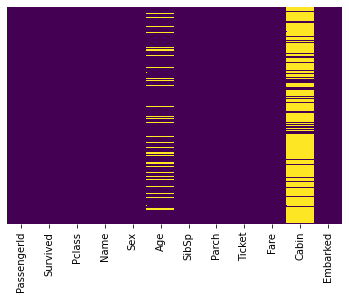

In [7]:
#above method is not efficient...so lets use heatmap
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')
#we have NaN values under Age and Cabin features

Some part of Age data is missing.The proportion of mising is small for replacement.In case of Cabin lots of data is missing.Later CabinSpecified-1 or 0 can replace the former

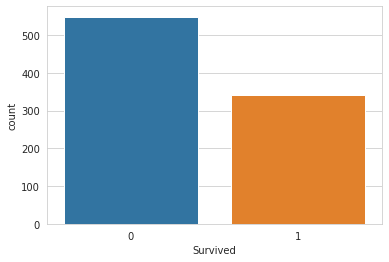

In [8]:
sns.set_style('whitegrid')
sns.countplot(data=train,x='Survived')
#around 500 died and around 300 survived

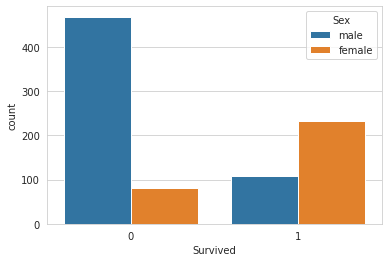

In [9]:
sns.set_style('whitegrid')
sns.countplot(data=train,x='Survived',hue='Sex')
#Differentiate males and females in the former
#Around 400 men died and around 100 women died
#Note that more women have survived

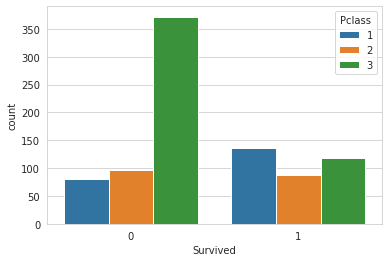

In [10]:
sns.set_style('whitegrid')
sns.countplot(data=train,x='Survived',hue='Pclass')
#3rd class people were more vulnerable

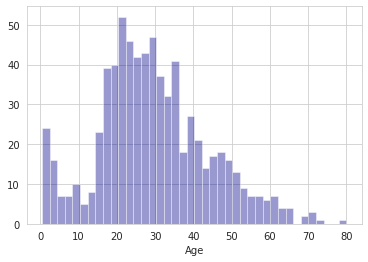

In [11]:
#Find the didtribution of Age i.e how the Age was distributed in the titanic
sns.distplot(train['Age'].dropna(),kde=False,bins=40,color='darkblue')
#drop NaN values of Age
#there are 10 ppl in Age group 8-10
#maximum ppl in range 20-30

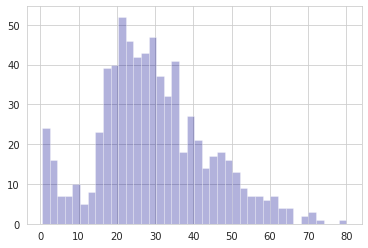

In [12]:
train['Age'].hist(bins=40,color='darkblue',alpha=0.3)
#alternate way

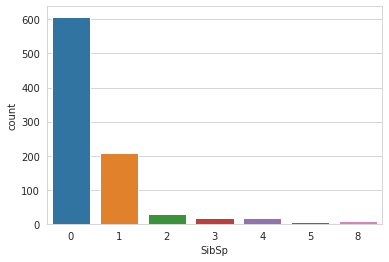

In [13]:
sns.countplot(data=train,x='SibSp')
#600 ppl did not have any sibling or spouse

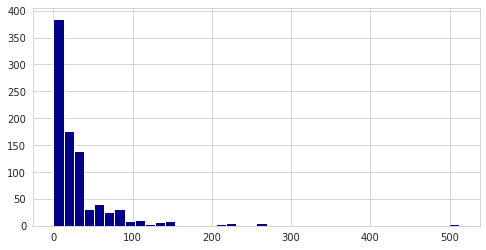

In [14]:
train['Fare'].hist(bins=40,color='darkblue',figsize=(8,4))
#what ppl paid for the ride

DATA CLEANING

We want to fill the missing Age data instead of just dropping them.One way to do this is to fill in average age of the passengers whose Age is not known.This is called imputation.

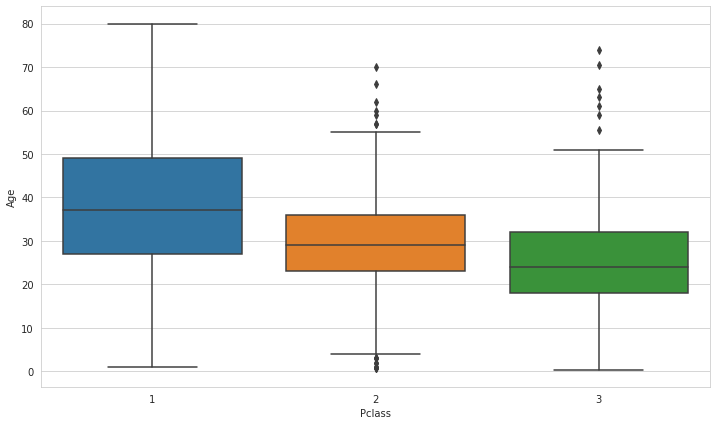

In [15]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass',y='Age',data=train)
#average age of ppl in class 1 is 37.Older ppl are in first class

In [16]:
def impute_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    if(pd.isnull(Age)):
        if(Pclass==1):
            return 37
        elif(Pclass==2):
            return 29
        else:
            return 24
    else:
        return Age

In [17]:
train['Age']=train[['Age','Pclass']].apply(impute_age,axis=1)
#apply the function for each passenger

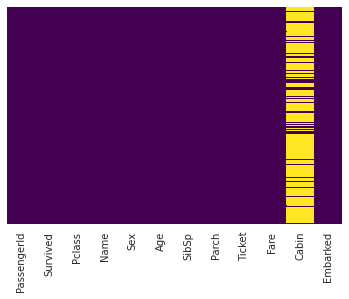

In [18]:
#check the heatmap again
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [19]:
#drop cabin column
train.drop('Cabin',axis=1,inplace=True)

In [20]:
#check is Cabin is dropped
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


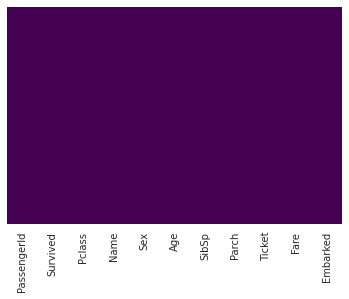

In [21]:
#check the heatmap again
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [22]:
train.dropna(inplace=True)

In [23]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [24]:
#convert categorical features(Sex and Embarked) to dummy variables.Otherwise the ML algo will not recognise the input.
pd.get_dummies(train['Embarked'],drop_first=True).head()
#get_dummies splits 2 categories into 1,3 into 2 and so on.
#drop_first removes the first column since it is not required.See below.

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [25]:
pd.get_dummies(train['Embarked'],drop_first=False).head()

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [26]:
sex=pd.get_dummies(train['Sex'],drop_first=True)
embark=pd.get_dummies(train['Embarked'],drop_first=True)

In [27]:
#drop all unnecessary columns
train.drop(['Sex','Embarked','Name','Ticket'],inplace=True,axis=1)

In [28]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [29]:
train=pd.concat([train,sex,embark],axis=1)

In [30]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [31]:
#drop Survived since it is a dependent feature
train.drop('Survived',axis=1).head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,3,22.0,1,0,7.2500,1,0,1
1,2,1,38.0,1,0,71.2833,0,0,0
2,3,3,26.0,0,0,7.9250,0,0,1
3,4,1,35.0,1,0,53.1000,0,0,1
4,5,3,35.0,0,0,8.0500,1,0,1


In [32]:
train['Survived'].head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [33]:
from sklearn.model_selection import train_test_split

In [35]:
X_train,X_test,Y_train,Y_test=train_test_split(train.drop('Survived',axis=1),train['Survived'],test_size=0.3,random_state=101)
#X is train.drop('Survived') and Y is train['Survived'] 

In [36]:
#train and predict
from sklearn.linear_model import LogisticRegression

In [37]:
logmodel=LogisticRegression()
logmodel.fit(X_train,Y_train)
#object is created

/home/vishal/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [38]:
predictions=logmodel.predict(X_test)

In [39]:
from sklearn.metrics import confusion_matrix

In [40]:
accuracy=confusion_matrix(Y_test,predictions)

In [41]:
accuracy

array([[149,  14],
       [ 39,  65]])

In [42]:
from sklearn.metrics import accuracy_score

In [43]:
accuracy=accuracy_score(Y_test,predictions)

In [44]:
accuracy
#accuracy after applying simple logistic regression

0.8014981273408239

In [45]:
predictions

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1])